# Implementing Trie in Python
## Credit: 
https://albertauyeung.github.io/2020/06/15/python-trie.html/


Trie is a tree-like data structure made up of nodes. Nodes can be used to store data. Each node may have none, one or more children. When used to store a vocabulary, each node is used to store a character, and consequently each "branch" of the trie represents a unique word. The following figure shows a trie with five words (was, wax, what, word, work) stored in it.

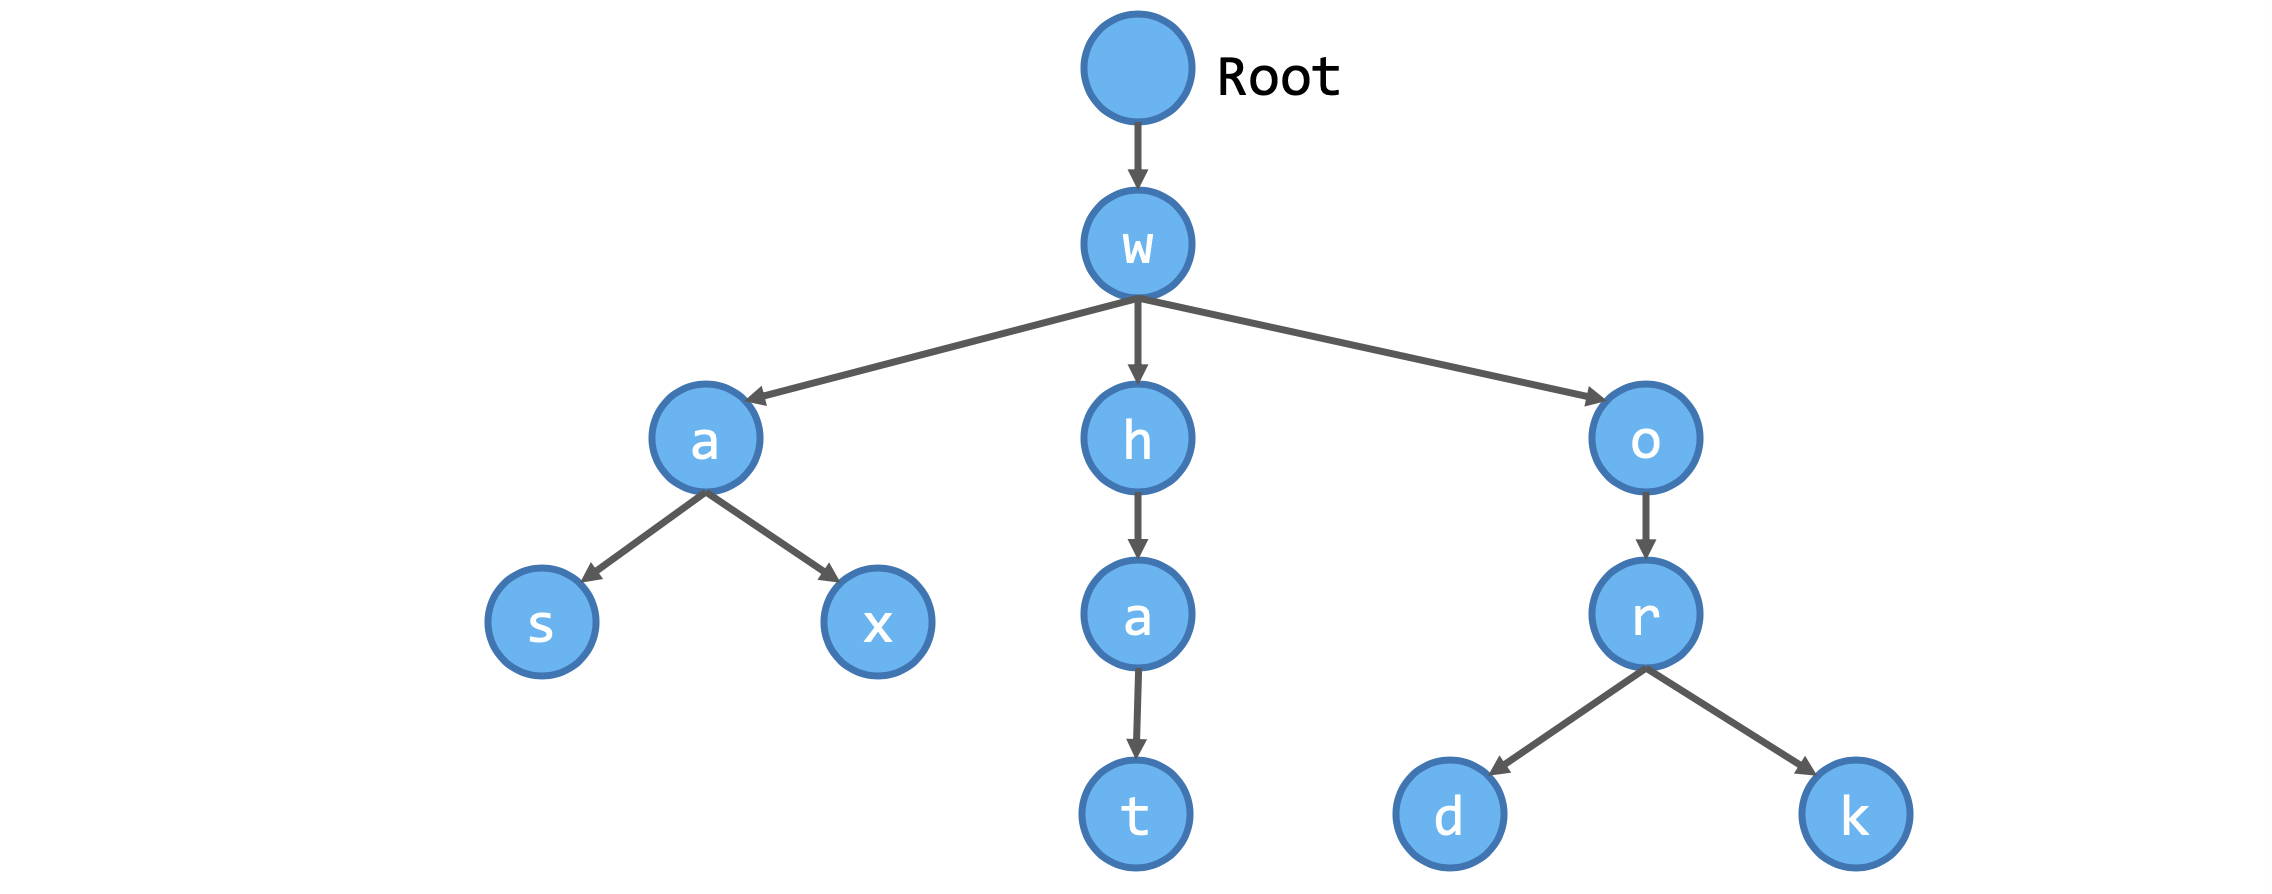

In [1]:
class TrieNode:
    """A node in the trie structure"""

    def __init__(self, char):
        # the character stored in this node
        self.char = char

        # whether this can be the end of a word
        self.is_end = False

        # a counter indicating how many times a word is inserted
        # (if this node's is_end is True)
        self.counter = 0

        # a dictionary of child nodes
        # keys are characters, values are nodes
        self.children = {}

In [2]:
class Trie(object):
    """The trie object"""

    def __init__(self):
        """
        The trie has at least the root node.
        The root node does not store any character
        """
        self.root = TrieNode("")
    
    def insert(self, word):
        """Insert a word into the trie"""
        node = self.root
        
        # Loop through each character in the word
        # Check if there is no child containing the character, create a new child for the current node
        for char in word:
            if char in node.children:
                node = node.children[char]
            else:
                # If a character is not found,
                # create a new node in the trie
                new_node = TrieNode(char)
                node.children[char] = new_node
                node = new_node
        
        # Mark the end of a word
        node.is_end = True

        # Increment the counter to indicate that we see this word once more
        node.counter += 1
        
    def dfs(self, node, prefix):
        """Depth-first traversal of the trie
        
        Args:
            - node: the node to start with
            - prefix: the current prefix, for tracing a
                word while traversing the trie
        """
        if node.is_end:
            self.output.append((prefix + node.char, node.counter))
        
        for child in node.children.values():
            self.dfs(child, prefix + node.char)
        
    def query(self, x):
        """Given an input (a prefix), retrieve all words stored in
        the trie with that prefix, sort the words by the number of 
        times they have been inserted
        """
        # Use a variable within the class to keep all possible outputs
        # As there can be more than one word with such prefix
        self.output = []
        node = self.root
        
        # Check if the prefix is in the trie
        for char in x:
            if char in node.children:
                node = node.children[char]
            else:
                # cannot found the prefix, return empty list
                return []
        
        # Traverse the trie to get all candidates
        self.dfs(node, x[:-1])

        # Sort the results in reverse order and return
        return sorted(self.output, key=lambda x: x[1], reverse=True)

In [3]:
t = Trie()
t.insert("was")
t.insert("word")
t.insert("war")
t.insert("what")
t.insert("where")
t.query("wh")

[('what', 1), ('where', 1)]

## Credit:
https://www.geeksforgeeks.org/trie-insert-and-search/

In [ ]:
# Python program for insert and search
# operation in a Trie

class TrieNode:
	
	# Trie node class
	def __init__(self):
		self.children = [None]*26

		# isEndOfWord is True if node represent the end of the word
		self.isEndOfWord = False

class Trie:
	
	# Trie data structure class
	def __init__(self):
		self.root = self.getNode()

	def getNode(self):
	
		# Returns new trie node (initialized to NULLs)
		return TrieNode()

	def _charToIndex(self,ch):
		
		# private helper function
		# Converts key current character into index
		# use only 'a' through 'z' and lower case
		
		return ord(ch)-ord('a')


	def insert(self,key):
		
		# If not present, inserts key into trie
		# If the key is prefix of trie node,
		# just marks leaf node
		pCrawl = self.root
		length = len(key)
		for level in range(length):
			index = self._charToIndex(key[level])

			# if current character is not present
			if not pCrawl.children[index]:
				pCrawl.children[index] = self.getNode()
			pCrawl = pCrawl.children[index]

		# mark last node as leaf
		pCrawl.isEndOfWord = True

	def search(self, key):
		
		# Search key in the trie
		# Returns true if key presents
		# in trie, else false
		pCrawl = self.root
		length = len(key)
		for level in range(length):
			index = self._charToIndex(key[level])
			if not pCrawl.children[index]:
				return False
			pCrawl = pCrawl.children[index]

		return pCrawl.isEndOfWord

# driver function
def main():

	# Input keys (use only 'a' through 'z' and lower case)
	keys = ["the","a","there","anaswe","any",
			"by","their"]
	output = ["Not present in trie",
			"Present in trie"]

	# Trie object
	t = Trie()

	# Construct trie
	for key in keys:
		t.insert(key)

	# Search for different keys
	print("{} ---- {}".format("the",output[t.search("the")]))
	print("{} ---- {}".format("these",output[t.search("these")]))
	print("{} ---- {}".format("their",output[t.search("their")]))
	print("{} ---- {}".format("thaw",output[t.search("thaw")]))

if __name__ == '__main__':
	main()